# CS 505 Homework 04:  Classification

#### Due Friday  10/27 at midnight (1 minute after 11:59 pm) in Gradescope (with a grace period of 6 hours)
#### You may submit the homework up to 24 hours late (with the same grace period) for a penalty of 10%.

All homeworks will be scored with a maximum of 100 points; point values are given
for individual problems, and if parts of problems do not have point values given, they
will be counted equally toward the total for that problem.

Note: I strongly recommend you work in **Google Colab** (the free version) to complete homeworks in this class; in addition to (probably) being faster than your laptop, all the necessary libraries will already be available to you, and you don't have to hassle with <code>conda</code>, <code>pip</code>, etc. and resolving problems when the install doesn't work. But it is up to you!   You should go through the necessary tutorials listed on the web site concerning Colab and storing files on a Google Drive. And of course, Dr. Google is always ready to help you resolve your problems.

I will post a  "walk-through" video ASAP on my <a href="https://www.youtube.com/channel/UCfSqNB0yh99yuG4p4nzjPOA">Youtube Channel</a>.

#### Submission Instructions

You must complete the homework by editing <b>this notebook</b> and submitting the following two files in Gradescope by the due date and time:

  - A file <code>HW04.ipynb</code> (be sure to select <code>Kernel -> Restart and Run All</code> before you submit, to make sure everything works); and
  - A file <code>HW04.pdf</code> created from the previous.
  
  For best results obtaining a clean PDF file on the Mac, select <code>File -> Print Review</code> from the Jupyter window, then choose <code>File-> Print</code> in your browser and then <code>Save as PDF</code>.  Something  similar should be possible on a Windows machine -- just make sure it is readable and no cell contents have been cut off. Make it easy to grade!
  
The date and time of your submission is the last file you submitted, so if your IPYNB file is submitted on time, but your PDF is late, then your submission is late.

## Collaborators (5 pts)

Describe briefly but precisely

1. Any persons you discussed this homework with and the nature of the discussion;
2. Any online resources you consulted and what information you got from those resources; and
3. Any AI agents (such as chatGPT or CoPilot) or other applications you used to complete the homework, and the nature of the help you received.

A few brief sentences is all that I am looking for here.

    <Your answer here>
    1. I discussed and compared the visualizations (graphs) with Junhui Cho in part 1 and also discussed on how to compute the word embeddings graph (the 5000 and 5000 matrix graph).
    2. I used https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html to learn about the sklearn and CountVectorizer -- especially fit_transform and get_feature_names_out().
      I used https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html to learn about TruncatedSVD.
      I used https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html to learn about TFIDFVectorizer.
      I used https://docs.python.org/3/library/collections.html to learn about Counters and most_common function.
      I used https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html to learn about PCA.
      I used https://radimrehurek.com/gensim/models/word2vec.html to learn about word2vec.
      I used https://realpython.com/natural-language-processing-spacy-python/ and https://medium.com/analytics-vidhya/introduction-to-nlp-library-spacy-in-python-a98cf344eb6d to learn about Spacy and its functions.
      I used the lectures on PyTorch from Professor Snyder (the ipynb files).
      I used https://pytorch.org/tutorials/beginner/saving_loading_models.html to learn about torch.save and torch.load.
    3. I used ChatGPT in 1.B to generate label right next to the points by using plt.text or plt.annotate in 1.E.
       I used ChatGPT to get help on loading the files to the Google Colab in part Two.


In [7]:
import math
import numpy as np
from numpy.random import shuffle, seed, choice
from tqdm import tqdm
from collections import defaultdict, Counter
import pandas as pd
import re
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F
from torch.utils.data import random_split,Dataset,DataLoader
from torchvision import datasets, transforms
from torch import nn, optim

from torchvision.datasets import MNIST
import torchvision.transforms as T

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer




## Problem One: Exploring Shakespeare's Plays with PCA (45 pts)

In this problem, we will use Principal Components Analysis to look at Shakespeare's plays, as
we discussed with a very different play/movie in lecture.  Along the way, we shall use the tokenizer and the TF-IDF vectorizer from `sklearn,`
a common machine learning library.

Note: There is a library for text analysis in Pytorch called `Torchtext`, however, in my view this will less well-developed and less well-supported than the rest of Pytorch, so we shall use `sklearn` for this problem.



### Part A:  Reading and exploring the data (5 pts)

The cells below read in three files and convert them to `numpy` arrays (I prefer to work with the arrays rather than with `pandas` functions, but it is your choice).  

1. The file `shakespeare_plays.csv` contains lines from William Shakespeare’s plays. The second column of the file contains the name of
the play, the third the name of the player (or the indication `<Stage Direction>`, and the fourth
the line spoken:



2. The file `play_attributes.csv` stores the genres and chronology of Shakepeare's plays; the first column is the name of the play, the second the genre, and the third its order in a chronological listing of when it was first performed. The plays are in the same (arbitrary) order as in the first file.



3. The file `player_genders.csv` stores the name of a major character (defined somewhat arbitrarily as one whose total lines contain more than 1400 characters) in the first column and their gender in the second.



**To Do:**   For each of the arrays, print out the the `shape` and the first line.


In [8]:
plays_array = pd.read_csv('https://www.cs.bu.edu/fac/snyder/cs505/shakespeare_plays.csv').to_numpy()

player_genders_array = pd.read_csv('https://www.cs.bu.edu/fac/snyder/cs505/player_genders.csv').to_numpy()

play_attributes_array = pd.read_csv('https://www.cs.bu.edu/fac/snyder/cs505/play_attributes.csv').to_numpy()

print(f"The shape of the play is {plays_array.shape}.")
print(f"The first line of plays_array is {plays_array[0]}.")

print()

print(f"The shape of the player gender is {player_genders_array.shape}.")
print(f"The first line of the player gender is {player_genders_array[0]}.")

print()

print(f"The shape of the play attribute is {play_attributes_array.shape}.")
print(f"The first line of play attribute is {play_attributes_array[0]}.")


The shape of the play is (111582, 4).
The first line of plays_array is [1 'Henry IV Part 1' '<Stage Direction>' 'ACT I'].

The shape of the player gender is (398, 2).
The first line of the player gender is ['AARON' 'male'].

The shape of the play attribute is (36, 3).
The first line of play attribute is ['Henry IV Part 1' 'History' 15].


### Part B: Visualizing the Plays (8 pts)

1. Create an array containing 36 strings, each being the concatenation of all lines spoken.   Be sure to NOT include stage directions!  You may wish to create an appropriate dictionary as an intermediate step.

2. Create a document-term matrix where each row represents a play and each column represents a term used in that play. Each entry in this matrix represents the number of times a particular word (defined by the column) occurs in a particular play (defined by the row). Use `CountVectorizer` in `sklearn` to create the matrix. Keep the rows in the same order as in the original files in order to associate play names with terms correctly.

3. From this matrix, use `TruncatedSVD` in `sklearn` to create a 2-dimensional representation of each play. Try to make it as similar as possible to the illustration below, including (i) appropriate title, (ii) names of each play, followed by its chronological order, and (iii) different colors for each genre. Use a `figsize` of `(8,8)` and a `fontsize` of `6` to provide the best visibility. You can follow the tutorial [here](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/) to create the visualization (look at the "PCA" part).

4. Now do the same thing all over again, but with TF-IDF counts (using `TFIDFVectorizer` in `sklearn`).


5. Answer the following in a few sentences:  What plays are similar to each other? Do they match the grouping of Shakespeare’s plays into comedies, histories, and tragedies here?  Which plays are outliers (separated from the others in the same genre)?  Did one of TF or TF-IDF provided the best insights?


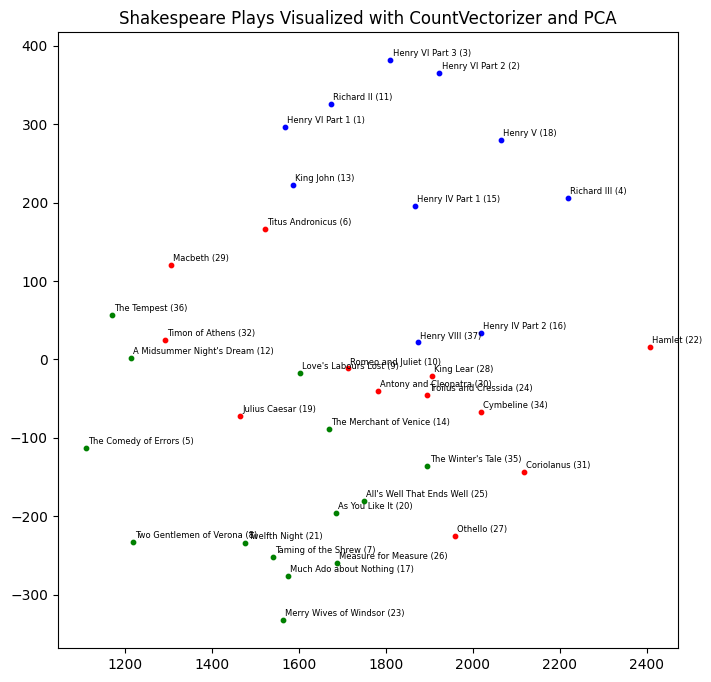

In [3]:
from collections import defaultdict
string_defaultdict = defaultdict(str)

genres = []
all_lines_spoken = []
play_names = []
numbers = []

for x in range(len(plays_array)):
    if plays_array[x][2] != '<Stage Direction>':
        string_defaultdict[plays_array[x][1]] += plays_array[x][3] + " "

for x in range(len(play_attributes_array)):
    genres.append(play_attributes_array[x][1])
    numbers.append(play_attributes_array[x][-1])

for key, value in string_defaultdict.items():
    all_lines_spoken.append(value)
    play_names.append(key)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_lines_spoken)
terms = vectorizer.get_feature_names_out()
document_term_matrix = pd.DataFrame(X.toarray(), columns=terms, index=play_names)


svd = TruncatedSVD(n_components=2)
svd = svd.fit_transform(document_term_matrix)

fig = plt.figure(figsize=(8, 8))
plt.title("Shakespeare Plays Visualized with CountVectorizer and PCA")

colors = []
for x in genres:
    if x == 'History':
        colors.append('b')
    elif x == 'Tragedy':
        colors.append('r')
    else:
        colors.append('g')


distance = 5
for i in range(len(play_names)):
    plt.scatter(svd[i, 0], svd[i, 1], label = genres[i], color = colors[i], s = 10)
    plt.text(svd[i, 0] + distance, svd[i, 1] + distance, play_names[i] + " (" + str(numbers[i]) + ")", fontsize=6)

plt.show()








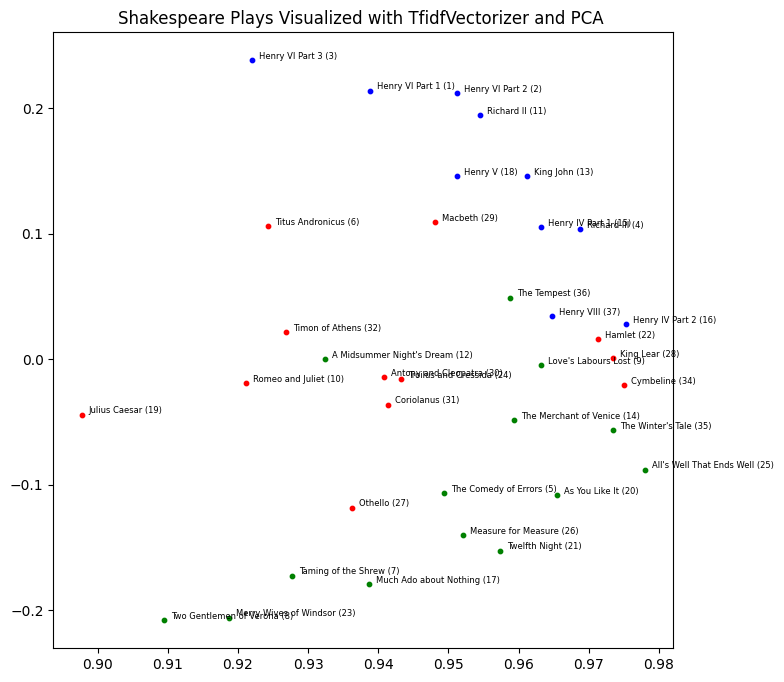

In [4]:

TFID = TfidfVectorizer()
X2 = TFID.fit_transform(all_lines_spoken)
terms2 = TFID.get_feature_names_out()
document_term_matrix2 = pd.DataFrame(X2.toarray(), columns=terms2, index=play_names)

svd2 = TruncatedSVD(n_components=2)
svd2 = svd2.fit_transform(document_term_matrix2)

fig = plt.figure(figsize=(8, 8))
plt.title("Shakespeare Plays Visualized with TfidfVectorizer and PCA ")

distance = 0.001
for i in range(len(play_names)):
    plt.scatter(svd2[i, 0], svd2[i, 1], label = genres[i], color = colors[i], s = 10)
    plt.text(svd2[i, 0] + distance, svd2[i, 1] + distance, play_names[i] + " (" + str(numbers[i]) + ")", fontsize=6)

plt.show()



Answer: Plays that are close to one another are similar to each other, such as "As you Like It" and "All's Well That Ends Well", and "Antony and Cleoptra" and "Troilus and Cressida". Most of the groupings are well-matched to each categories of comedy, history, and tragedy, but there exists a few outliers. For instance, "Henry VIII" and "Henry IV Part 2" are outliers from the History section, "Hamlet" is an outlier from the tragedy section, and "The Tempest" and "A Midsummer Night's Dream" are outliers for comedy section.

The PCA using TFIDFVectorizer provides a better model because there are less outliers and the sections are well-divided for each category. Also, the y-axis and x-axis values for the TFIDFVectorizer are smaller compared to the CountVectorizer model, meaning that the data points are closer to each other.

In both of the graphs, the history section, in general, belongs at the very top section with positive y-axis, the tragedy section belongs at the middle section with 0 value of y-axis in general, and the comedy section has negaive y-axis value in general.


### Part C: Visualizing the Players (8 pts)

Now you must repeat this same kind of visualization, but instead of visualizing plays, you must visualize players.
The process will be essentially the same, starting with an array of strings representing the lines spoken by each player. Use one of TF or TF-IDF, and use different colors for the genders.

Use a figsize of (8,8) and a fontsize of 4 to make this a bit more visible.

Again, comment on what you observe (it will not be as satisfying as the previous part).

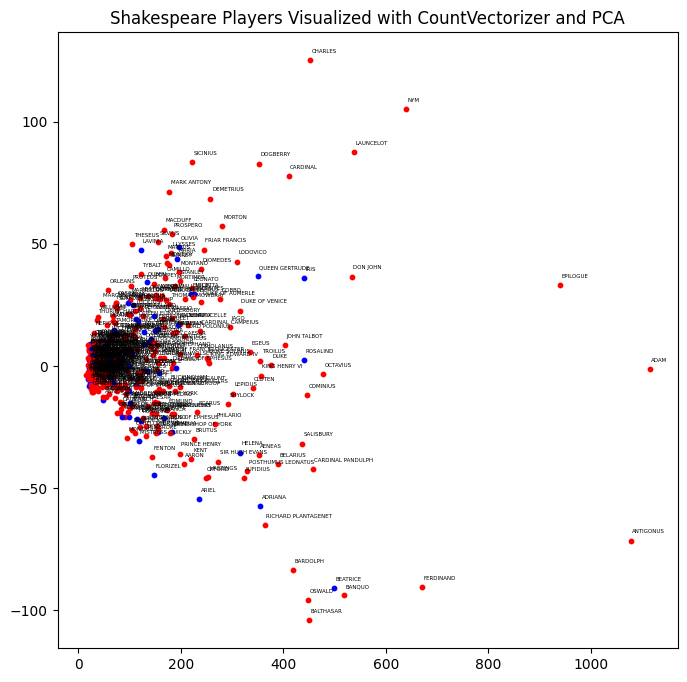

In [61]:
string_defaultdict2 = defaultdict(str)

genders = []
all_lines_spoken2 = []
players = []


for x in range(len(player_genders_array)):
    genders.append(player_genders_array[x][1])
    players.append(player_genders_array[x][0])


for x in range(len(plays_array)):
    if ((plays_array[x][2] != '<Stage Direction>') and (plays_array[x][2] in players)):
        string_defaultdict2[plays_array[x][2]] += plays_array[x][3] + " "



for key, value in string_defaultdict2.items():
    all_lines_spoken2.append(value)



vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_lines_spoken2)
terms = vectorizer.get_feature_names_out()
document_term_matrix = pd.DataFrame(X.toarray(), columns=terms, index=players)


svd = TruncatedSVD(n_components=2)
svd = svd.fit_transform(document_term_matrix)

fig = plt.figure(figsize=(8, 8))
plt.title("Shakespeare Players Visualized with CountVectorizer and PCA")

colors = []
for x in genders:
    if x == 'male':
        colors.append('r')
    elif x == 'female':
        colors.append('b')


distance = 3
for i in range(len(players)):
    plt.scatter(svd[i, 0], svd[i, 1], label = genders[i], color = colors[i], s = 10)
    plt.text(svd[i, 0] + distance, svd[i, 1] + distance, players[i], fontsize=4)

plt.show()





Most of the words spoken by female characters are displayed together, with a few exceptions (outliers). Compared to the words spoken by female characters, those spoken by male characters are more spread from each other in general. Surprisingly, most of the data points are located clustered on the left middle region close to the origin, which might be caused from the lack of data (not every character speaks the same amount of words).

### Part D:  DIY Word Embeddings (8 pts)

In this part you will create a word-word matrix where each row (and each column) represents a word in the vocabulary.
Each entry in this matrix represents the number of times a particular word (defined by the row) co-occurs with another
word (defined by the column) in a sentence (i.e., line in `plays`). Using the row word vectors, create a document-term matrix which represents
a play as the average of all the word vectors in the play.

Display the plays using `TruncatedSVD` as you did previously.  Use one of TF or TF-IDF.

Again, comment on what you observe: how different is this from the first visualization?

**Notes:**  

1. Remove punctuation marks .  ,  ;  :  ?  ! but leave single quotes.
2. One way to proceed is to create a nested dictionary mapping each word to a dictionary of the frequency of words that occur in the same line, then from this to create the sparse matrix which is used to create the aerage document-term matrix which is input to `TruncatedSVD`.
3. If you have trouble with the amount of memory necessary, you may wish to eliminate "stop words" and then isolate some number (say, 5000) of the remaining most common words, and build your visualization on that instead of the complete vocabulary.


In [9]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
common_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
word_co_occur = defaultdict(lambda: defaultdict(int))

all_words = []

for x in range(len(plays_array)):
    if plays_array[x][2] != "<Stage Direction>":
        line = plays_array[x][3].lower()
        empty_list = re.sub(r'.,;:?!', '', line).split()
        all_words.extend(empty_list)

word_counter = [word for word in all_words if word not in common_words]
word_counter = Counter(word_counter)
most_common_5000_words = word_counter.most_common(5000)
most_common_5000_words = [w[0] for w in most_common_5000_words]
print(len(most_common_5000_words))
print(most_common_5000_words[:5])

for x in range(len(plays_array)):
  if plays_array[x][2] != "<Stage Direction>":
    line = plays_array[x][3].lower()
    empty_list = re.sub(r'.,;:?!', '', line).split()
    for a in range(len(empty_list)):
      for b in range(a, len(empty_list)):
        first_word = empty_list[a]
        second_word = empty_list[b]
        if first_word in most_common_5000_words and second_word in most_common_5000_words:
          word_co_occur[first_word][second_word] += 1
          word_co_occur[second_word][first_word] += 1

print(len(word_co_occur))

w_matrix = np.zeros((len(most_common_5000_words), len(most_common_5000_words)))
for a, first_word in enumerate(most_common_5000_words):
    for b, second_word in enumerate(most_common_5000_words):
        w_matrix[a][b] = word_co_occur[first_word][second_word]





5000
['thou', 'thy', 'shall', 'good', 'would']
5000


In [52]:
average_of_all_word_vectors = []
string_defaultdict = defaultdict(str)
all_lines_spoken = []


for x in range(len(plays_array)):
    if plays_array[x][2] != '<Stage Direction>':
        string_defaultdict[plays_array[x][1]] += plays_array[x][3] + " "

for key, value in string_defaultdict.items():
    all_lines_spoken.append(value)

for play in all_lines_spoken:
    lines = play.lower()
    empty = re.sub(r'.,;:?!', '', lines).split()
    each_play = np.zeros(len(most_common_5000_words))
    count = 0

    for word in empty:
        if word in most_common_5000_words:
            position = most_common_5000_words.index(word)
            each_play += w_matrix[position]
        count += 1

    each_play /= count
    average_of_all_word_vectors.append(each_play)


svd = TruncatedSVD(n_components=2)
svd = svd.fit_transform(average_of_all_word_vectors)

svd = average_of_all_word_vectors

36
[1.16359144e+02 4.81125850e+01 4.24996269e+01 ... 2.70270270e-02
 2.62808821e-02 3.13380866e-02]


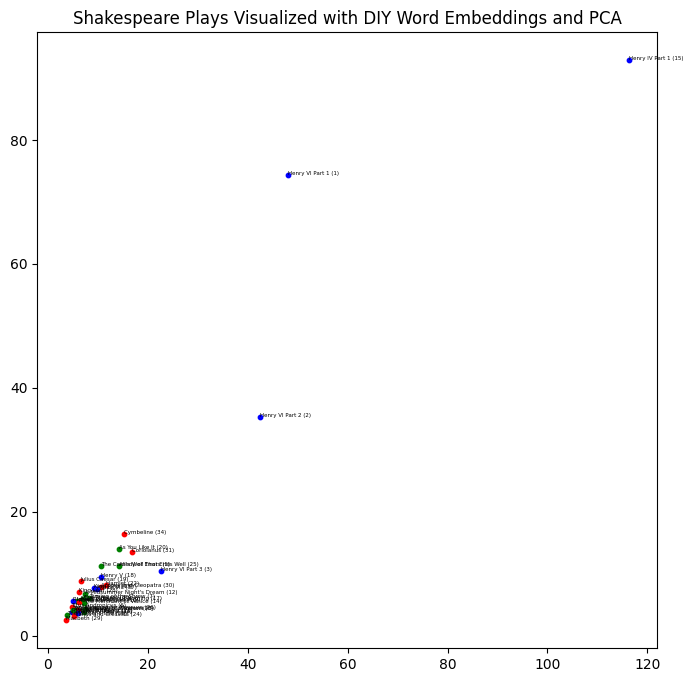

In [53]:
print(len(average_of_all_word_vectors))

print(svd[0])

fig = plt.figure(figsize=(8, 8))
plt.title("Shakespeare Plays Visualized with DIY Word Embeddings and PCA")

distance = 0.0001
genres = []
for x in range(len(play_attributes_array)):
    genres.append(play_attributes_array[x][1])
colors = []
for x in genres:
    if x == 'History':
        colors.append('b')
    elif x == 'Tragedy':
        colors.append('r')
    else:
        colors.append('g')
for i in range(len(play_names)):
    plt.scatter(svd[0][i], svd[1][i], label = genres[i], color = colors[i], s = 10)
    plt.text(svd[0][i] + distance, svd[1][i] + distance, play_names[i] + " (" + str(numbers[i]) + ")", fontsize=4)
plt.show()

During the process, I did not encounter the stop words in the consideration. Also, due to the runtime and the limited RAM, I only considered the 5000 most common words as the hint provided (except the stop words like I mentioned above).

The word embeddings graph is a lot different compared to the first graph. There are three outliers: 'Henry VI Part 1', 'Henry VI Part 2', and 'Henry IV Part 1'. It is interesting to see that they all are Henry series (History genre). Unlike the first graph, most of the points are clustered together to each other, meaning that the word embeddings of plays other than the three words are similar. Due to the word embeddings graph, I now understand why some people argue that a few of the plays written by Shakespeare are not actually his work.

### Part E:  Visualizing the Plays using Word2Vec Word Embeddings (8 pts)

Now we will do the play visualization using word embeddings created by Gensim's `Word2Vec`, which can create word embeddings just as you did in the previous part, but using better algorithms.

You can read about how to use `Word2Vec` and get template code here:

https://radimrehurek.com/gensim/models/word2vec.html

I strongly recommend you follow the directions for creating the model, then using `KeyedVectors` to
avoid recomputing the model each time.

Experiment with the `window` (say 5) and the `min_count` (try in the range 1 - 5) parameters to get the best results.

Display the plays using `PCA` instead of `TruncatedSVD`.  Use one of TF or TF-IDF.

Again, comment on what you observe: how different is this from the other visualizations?


In [63]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

words = []
count = 0

for x in all_lines_spoken:

  empty_list = re.sub(r'."-,;:?!', '', x.lower()).split()
  words.append(empty_list)

model = Word2Vec(sentences = words, vector_size = 100, window = 5, min_count = 1, workers = 4)




In [64]:
wordToVec = model.wv
wordToVec.save("ShakespeareGenreWordVectors")

In [65]:
wordVectors = KeyedVectors.load("ShakespeareGenreWordVectors")

In [66]:
print(wordVectors['man'])

[-0.16969062  1.3248118   0.13508773  0.39002845  0.15060619 -1.680494
  0.2672431   2.2819464  -1.5261703  -1.8060108  -0.14945301 -1.2914287
 -0.04996748  1.070461    0.95069635 -0.9364163   0.79538405 -0.01572739
  0.1344739  -2.3104396   0.7104981  -0.9883355   0.5539825   0.2749508
 -1.1025242   0.08896069 -0.6761798  -0.46866053 -0.51419926  0.09306739
  1.4513763  -0.736561    0.05242432 -1.395228    0.00872688  0.9366343
  0.77967876  0.57190704 -0.7511365  -0.6387253   0.6236905  -0.18057652
 -1.4114301   0.9670202   0.36241114 -0.67632645 -0.5876843   0.29650038
  0.18594232  0.21433039  0.68131155 -0.4618027   0.24635832 -0.28271633
  0.3981353   1.1168524   0.42793006 -1.1415328  -0.4067331  -0.42406183
 -0.20033836 -0.3762966   0.43913457  0.54474527 -0.76644284  0.8601379
  0.21271369  0.78601396 -1.3181996   1.1683933  -0.33511636  0.8687984
  1.1486716   0.94546777  1.452838    0.6073842  -0.38765404  1.0918595
  0.12152436 -0.43094745 -1.209289   -0.6497107  -0.5896221

In [67]:
wordVecLst = []
for x in all_lines_spoken:
  wordVec = re.sub(r'.,;:?!', '', x.lower()).split()
  emptyWordVec = np.zeros(100)
  for w in wordVec:
    emptyWordVec += wordVectors[w]
  emptyWordVec /= len(wordVec)
  wordVecLst.append(emptyWordVec)

[[-0.01464818 -0.03392772]
 [-0.3609922   0.02282272]
 [-0.23407594 -0.00712039]
 [-0.23712039  0.00276189]
 [ 0.27104709 -0.07346419]
 [ 0.35150576 -0.09495055]
 [-0.09716293  0.05712409]
 [ 0.23740258  0.06272171]
 [ 0.00584956 -0.09682712]
 [-0.03450441 -0.02052613]
 [-0.03727217 -0.0638235 ]
 [-0.29820456 -0.13291172]
 [-0.03844641 -0.1303705 ]
 [-0.19433727 -0.10626713]
 [ 0.11394618 -0.01764152]
 [-0.08372948  0.09104682]
 [-0.17105204 -0.01006185]
 [-0.27729838 -0.05004361]
 [ 0.25666835 -0.04883162]
 [ 0.21505275 -0.06155601]
 [ 0.24265303  0.09629689]
 [-0.08855226  0.0384335 ]
 [ 0.41030607 -0.04886053]
 [ 0.17719563  0.06950448]
 [-0.26559062 -0.0428065 ]
 [-0.09750603  0.00819984]
 [-0.0917158   0.12741826]
 [ 0.21783265  0.12817846]
 [-0.12005882  0.09740984]
 [-0.18440919  0.14144035]
 [-0.20006366  0.05782855]
 [-0.20032326  0.06716697]
 [ 0.30214852  0.03710681]
 [ 0.33171086  0.08248907]
 [ 0.1545862  -0.05500432]
 [ 0.03915876 -0.09295534]]
36


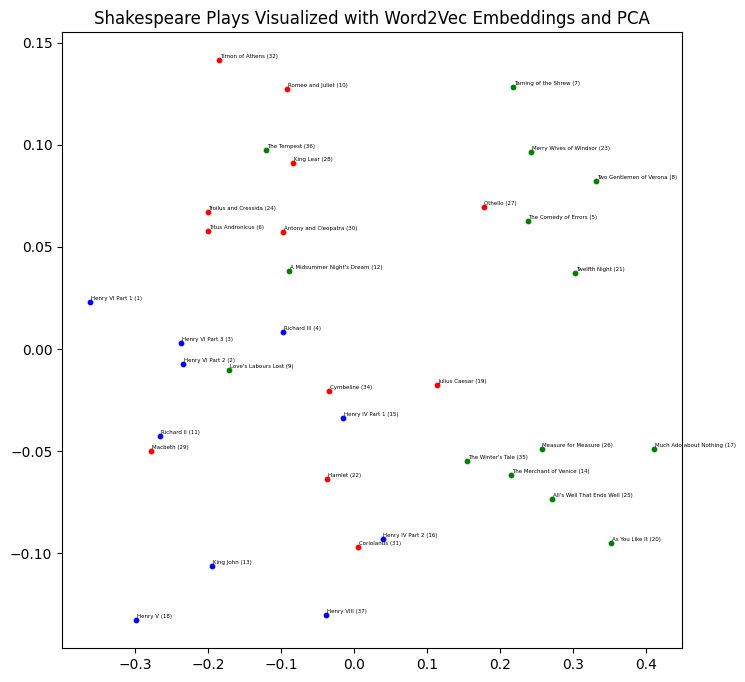

In [75]:

pca = PCA(n_components=2)
word_vector_2d = pca.fit_transform(wordVecLst)

result = word_vector_2d

print(result)
print(len(result))

X = result[:, 0]
y = result[:, 1]

plt.figure(figsize=(8, 8))
plt.title("Shakespeare Plays Visualized with Word2Vec Embeddings and PCA")

distance = 0.001

genres = []
for x in range(len(play_attributes_array)):
    genres.append(play_attributes_array[x][1])
colors = []
for x in genres:
    if x == 'History':
        colors.append('b')
    elif x == 'Tragedy':
        colors.append('r')
    else:
        colors.append('g')

distance = 0.001
for i in range(len(play_names)):
    plt.scatter(X[i], y[i], label = genres[i], color = colors[i], s = 10)
    plt.text(X[i] + distance, y[i] + distance, play_names[i] + " (" + str(numbers[i]) + ")", fontsize=4)


plt.show()


This graph is different from the word embeddings graph in part D. It looks as if the points are all separated and therefore looks difficult to classify according to the genres. Most of the green data points, which are labaled as Comedy, lie on the right side of the graph with a few outliers: 'The Tempest', 'A Midsummer Night's Dream', and 'Love Labours Lost'.The blue data points, labeled as history, lie on the right bottom corner and the red data points, labeled as tragedy, looks complicated to classify.

However, I noticed that the x-axis and y-axis points are very close to 0, meaning that if we view this graph in a big picture, the poems written by Shakespeare are all correlated to each other, different from the graph in part D. (There is not a particular play that is a huge outlier from other plays even though their the plays are difficult to classify in respect to their genres)

### Part F:  Visualizing the Players using Word2Vec Word Embeddings (8 pts)

Now you must repeat Part C, but using these `Word2Vec` embeddings.

Use a figsize of (8,8) and a fontsize of 4 to make this a bit more visible.

Again, comment on what you observe. How is this different from what you saw in Part C?


In [69]:
words2 = []
count = 0

for x in all_lines_spoken2:
  empty_list = re.sub(r'."-,;:?!', '', x.lower()).split()
  words2.append(empty_list)

model2 = Word2Vec(sentences = words2, vector_size = 100, window = 5, min_count = 1, workers = 4)

In [72]:
wordToVec2 = model2.wv
wordToVec2.save("ShakespeareGenderWordVectors")

In [73]:
wordVectors2 = KeyedVectors.load("ShakespeareGenderWordVectors")

In [74]:
wordVecLst2 = []
for x in all_lines_spoken2:
  wordVec = re.sub(r'.,;:?!', '', x.lower()).split()
  emptyWordVec = np.zeros(100)
  for w in wordVec:
    emptyWordVec += wordVectors2[w]
  emptyWordVec /= len(wordVec)
  wordVecLst2.append(emptyWordVec)



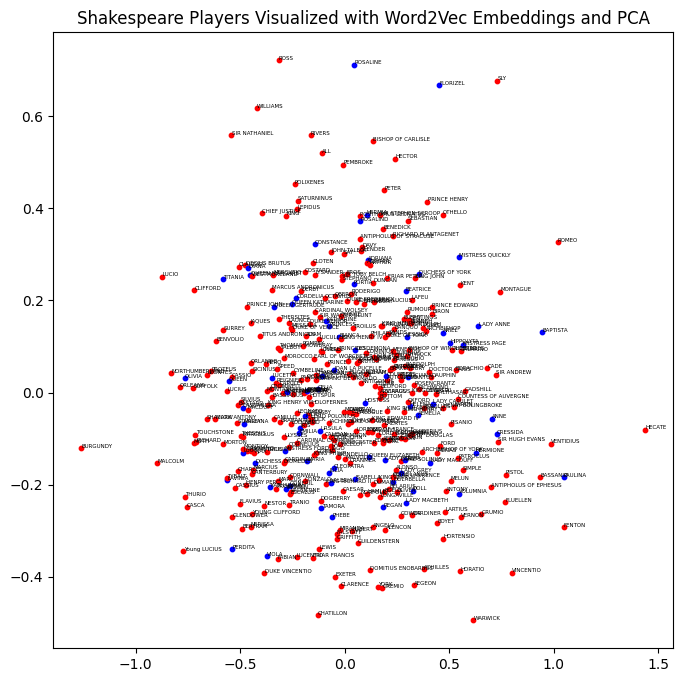

In [76]:

pca2 = PCA(n_components=2)
word_vector_2d2 = pca2.fit_transform(wordVecLst2)

result2 = word_vector_2d2

X2 = result2[:, 0]
y2 = result2[:, 1]

plt.figure(figsize=(8, 8))
plt.title("Shakespeare Players Visualized with Word2Vec Embeddings and PCA")

colors = []
for x in genders:
    if x == 'male':
        colors.append('r')
    elif x == 'female':
        colors.append('b')

distance = 0.001
for i in range(len(players)):
    plt.scatter(X2[i], y2[i], label = genders[i], color = colors[i], s = 10)
    plt.text(X2[i] + distance, y2[i] + distance, players[i], fontsize=4)


plt.show()


This is different compared to what I saw in part C. Similar to part C, the speakers cannot be classified into two different sections according to their gender and the points are clustered in the x-axis and y-axis near the origin. However, in this section, there are no outliers and most of the data points are clustered with one another. I can say that there are some points away from where most of the points are but the distance is very small considering the small x-axis and y-axis values. Furthermore, similar to part 1.E, the word embedding graphs according to the players are very clustered and even though it is difficult to analyze once we zoom into the graph, when we look at the diagram in big picture, it will appear as if the players are very close to each other.

## Problem Two: Classifying Text with a Feed-Forward Neural Network (50 pts)


In this problem, you must create a FFNN in Pytorch to classify emails from the Enron dataset as to whether they
are spam or not spam ("ham"). For this problem, we will use `Glove` pretrained embeddings. The dataset
and the embeddings are in the following location:

https://drive.google.com/drive/folders/1cHR4VJuuN2tEpSkT3bOaGkOJrvIV-lSR?usp=sharing

(You can also download the embeddings yourself from the web; but the dataset is one created
just for this problem.)

### Part A: Prepare the Data (10 pts)

Compute the features of the emails (the vector of 100 floats input to the NN) vector based on the average value of the word vectors that belong to the words in it.

Just like the previous problem, we compute the 'representation' of each message, i.e. the vector, by averaging word vectors; but this time, we are using [Glove word embeddings](https://nlp.stanford.edu/projects/glove/) instead. Specifically, we are using word embedding 'glove.6B.100d' to obtain word vectors of each message, as long as the word is in the 'glove.6B.100d' embedding space.

Here are the steps to follow:

1. Have a [basic idea](https://nlp.stanford.edu/pubs/glove.pdf) of how Glove provides pre-trained word embeddings (vectors).
2. Download and extract word vectors from 'glove.6B.100d'.
3. Tokenize the messages ( `spacy` is a good choice) and compute the message vectors by averaging the vectors of words in the message. You will need to test if a word is in the model (e.g., something like ` if str(word) in glove_model ...`) and ignore any words which have no embeddings.


### Part B: Create the DataLoader (15 pts)

Now you must separate the data set into training, validation, and testing sets, and build a 'Dataset' and 'DataLoader' for each that can feed data to train your model with Pytorch.

Use a train-validation-test split of 80%-10%-10%. You can experiment with different batch sizes, starting with 64.



Hints:
1. Make sure `__init__` , `__len__` and `__getitem__` of the your defined dataset are implemented properly. In particular, the `__getitem__` should return the specified message vector and its label.
2. Don't compute the message vector when calling the `__getitem__` function, otherwise the training process will slow down A LOT. Calculate these in an array before creating the data loader in the next step.
3. The data in the `.csv` is randomized, so you don't need to shuffle when doing the split.

In [ ]:
## Part A
import spacy

glove6B100d = defaultdict(int)
all_possible_words_in_file = []
respective_vector = []
file_path = "/content/glove.6B.100d.txt"
with open(file_path, 'r') as file:
  for line in file:
    items = line.split()
    word = items[0]
    all_possible_words_in_file.append(word)
    numbers = [float(num) for num in items[1:]]
    respective_vector.append(numbers)





In [ ]:
file_path2 = "/content/enron_spam_ham.csv"
df = pd.read_csv(file_path2)

messages_value = []
spam_or_ham = df["Spam"].tolist()

nlp = spacy.load("en_core_web_sm")

word_vectors = []
parsed_sents = [nlp(line_of_csv).text.split() for line_of_csv in df["Message"]]







In [ ]:
c = 0
for x in parsed_sents:
  c += 1
  count = 0
  if c % 1000 == 0:
    print(c)
  each_message = np.zeros(100)
  for word in x:
    count += 1
    if word in all_possible_words_in_file:
      position = all_possible_words_in_file.index(word)
      each_message += respective_vector[position]
  average_message = [number / count for number in each_message]
  word_vectors.append(average_message)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [ ]:
## Part B

X = word_vectors
Y = spam_or_ham


X = torch.tensor(X).float()
Y = torch.tensor(Y).long()

print(Y.shape)

def separate_data(X,Y,per_val = 0.1, per_test = 0.1):
  N = len(X)
  len_validation = int(per_val*N)
  len_test = int(per_test*N)
  len_train = N - len_validation - len_test

  len_t_v = len_train+len_validation

  X_train = X[:len_train]
  Y_train = Y[:len_train]
  X_validation = X[len_train:len_t_v]
  Y_validation = Y[len_train:len_t_v]
  X_test = X[len_t_v:]
  Y_test = Y[len_t_v:]

  return (X_train,Y_train,X_validation,Y_validation,X_test,Y_test)

train_X_G, train_Y_G, val_X_G, val_Y_G, test_X_G, test_Y_G = separate_data(X,Y,0.1,0.1)

class SpamOrHamDataset(Dataset):
  def __init__(self, X, Y):
    self.X_G = X
    self.Y_G = Y

  def __len__(self):
    return len(self.X_G)

  def __getitem__(self,idx):
    return self.X_G[idx], self.Y_G[idx]


torch.Size([28138])


In [ ]:
batch_size = 64
g_ds_train = SpamOrHamDataset(train_X_G, train_Y_G)
g_ds_val = SpamOrHamDataset(val_X_G, val_Y_G)
g_ds_test = SpamOrHamDataset(test_X_G, test_Y_G)

glove_training_dataloader = DataLoader(g_ds_train, batch_size = batch_size, shuffle = False)
glove_validation_dataloader = DataLoader(g_ds_val, batch_size = batch_size, shuffle = False)
glove_testing_dataloader = DataLoader(g_ds_test, batch_size = batch_size, shuffle = False)


### Part C:  Build the neural net model (25 pts)

Once the data is ready, we need to design and implement our neural network model.

The model does not need to be complicated. An example structure could be:

1. linear layer 100 x 15
2. ReLU activation layer
3. linear layer 15 x 2

But feel free to test out other possible combinations of linear layers & activation function and whether they make significant difference to the model performance later.

In order to perform "early stopping," you must keep track of the best validation score as you go through the epochs, and
save the best model generated so far; then use the model which existed when the validation score
was at a minimum to do the testing. (This could also be the model which is deployed, although we won't
worry about that.) Read about `torch.save(...)` and `torch.load(...)` to do this.

Experiment with different batch sizes and optimizers and learning rates to get the best validation
score for the model you create with early stopping. (Try not to look *too hard* at the final accuracy!) Include your final performance charts (using `show_performance_curves`) when you submit.

Conclude with a brief analysis (a couple of sentences is fine) relating what experiments you did,
and what choices of geometry, optimizer, learning rate, and batch size gave you the best results.
It should not be hard to get well above 90% accuracy on the final test.

In [ ]:
class GloveModel(nn.Module):
  def __init__(self):
    super(GloveModel,self).__init__()
    self.hidden_layer1 = nn.Linear(100, 10)
    self.relu = nn.ReLU()
    self.hidden_layer2 = nn.Linear(10,10)
    self.hidden_layer3 = nn.Linear(10, 2)

  def forward(self,x):
    x = self.hidden_layer1(x)
    x = self.relu(x)
    x = self.hidden_layer2(x)
    x = self.relu(x)
    x = self.hidden_layer3(x)
    return x

In [ ]:
def show_performance_curves(training_loss,validation_loss,training_accuracy,validation_accuracy,test_accuracy):

    plt.figure(figsize=(5, 3))
    plt.plot(training_loss,label='Training',color='g')
    plt.plot(validation_loss,label='Validation',color='b')
    plt.title('Training and Validation Loss')
    plt.legend(loc='upper right')
#     plt.ylim(-0.1,(max(max(training_loss),max(validation_loss))*1.1) )
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

    print('Final Training Loss:  ',np.around(training_loss[-1],6))
    print('Final Validation Loss:',np.around(validation_loss[-1],6))

    plt.figure(figsize=(5, 3))
    plt.plot(training_accuracy,label='Training',color='g')
    plt.plot(validation_accuracy,label='Validation',color='b')
    plt.title('Training and Validation Accuracy')
    plt.legend(loc='lower right')
#     plt.ylim(-0.1,1.1)
    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    print('Final Training Accuracy:  ',np.around(training_accuracy[-1],6))
    print('Final Validation Accuracy:',np.around(validation_accuracy[-1],6))
    print()

    print("Test Accuracy:", test_accuracy.item())
    print()

100%|██████████| 500/500 [03:56<00:00,  2.11it/s]


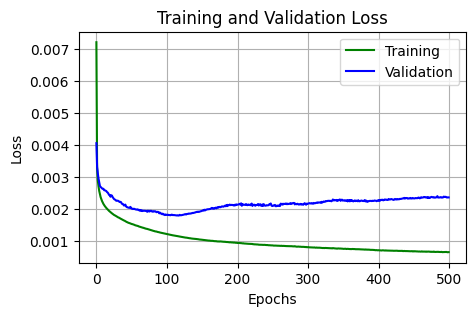

Final Training Loss:   0.000642
Final Validation Loss: 0.002352


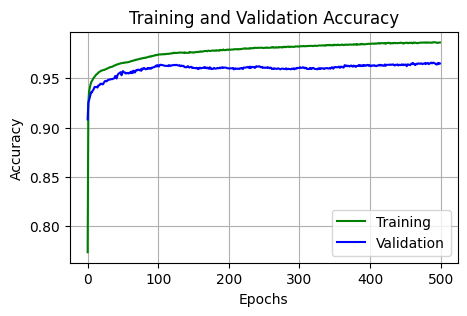

Final Training Accuracy:   0.986407
Final Validation Accuracy: 0.965162

Test Accuracy: 0.9708496332168579



In [ ]:
glove_model = GloveModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(glove_model.parameters(), lr = 0.001)
num_epochs = 500
batch_size = 64
training_losses = np.zeros(num_epochs)
val_losses      = np.zeros(num_epochs)

training_accuracy = np.zeros(num_epochs)
val_accuracy      = np.zeros(num_epochs)

save_model_val = float(0)
save_model = GloveModel()

for epoch in tqdm(range(num_epochs)):
  # Training here
  glove_model.train()
  t_loss = 0.0
  t_num_correct = 0

  for X_train_batch,Y_train_batch in glove_training_dataloader:

    optimizer.zero_grad()
    Y_train_hat = glove_model(X_train_batch)
    loss = loss_fn(Y_train_hat,Y_train_batch)
    loss.backward()
    optimizer.step()
    t_loss += loss.item()

    t_num_correct += (torch.argmax(Y_train_hat,dim=1) == Y_train_batch).float().sum()

  training_losses[epoch]   = t_loss/len(train_X_G)
  training_accuracy[epoch] = t_num_correct/len(train_X_G)

  # Validation section
  v_loss = 0.0
  glove_model.eval()
  v_num_correct = 0

  for X_val_batch,Y_val_batch in glove_validation_dataloader:
    Y_hat_val = glove_model(X_val_batch)
    loss = loss_fn(Y_hat_val,Y_val_batch)
    v_loss += loss.item()

    v_num_correct += (torch.argmax(Y_hat_val,dim=1) == Y_val_batch).float().sum()

  val_losses[epoch]   = v_loss/len(val_X_G)
  val_accuracy[epoch] = v_num_correct/len(val_X_G)
  if val_accuracy[epoch] > save_model_val:
    torch.save(glove_model, 'glove_model.pth')
    save_model_var = val_accuracy[epoch]




save_model = torch.load('glove_model.pth')
  # testing section
num_correct_test = 0
save_model.eval()

for X_test_batch,Y_test_batch in glove_testing_dataloader:
    Y_hat_test = glove_model(X_test_batch)
    num_correct_test += (torch.argmax(Y_hat_test,dim=1) == Y_test_batch).float().sum()

test_accuracy = num_correct_test / len(test_X_G)

show_performance_curves(training_losses,val_losses,training_accuracy,val_accuracy,test_accuracy)


**Results:**

Used epoch = 500

A. Using SGD
1. Three linear layers and two relu activations, Optimizer = SGD, learning rate = 0.01, batch_size = 64 --> Accuracy of 96.37%
2. Three linear layers and two relu activations, Optimizer = SGD, learning rate = 0.001, batch_size = 64 --> Accuracy of 94.66%
3. Three linear layers and two relu activations, Optimizer = SGD, learning rate = 0.01, batch_size = 128 --> Accuracy of 96.66%
4. Three linear layers and two relu activations, Optimizer = SGD, learning rate = 0.001, batch_size = 128 --> Accuracy of 94.95%

B. Using Adam
1. Three linear layers and two relu activations, Optimizer = Adam, learning rate = 0.01, batch_size = 64 --> Accuracy of 96.84%
2. Three linear layers and two relu activations, Optimizer = Adam, learning rate = 0.001, batch_size = 64 --> Accuracy of 97.08%
3. Three linear layers and two relu activations, Optimizer = Adam, learning rate = 0.01, batch_size = 128 --> Accuracy of 97.01%
4. Three linear layers and two relu activations, Optimizer = Adam, learning rate = 0.001, batch_size = 128 --> Accuracy of 96.55%

C. Using Adagrad
1. Three linear layers and two relu activations, Optimizer = Adagrad, learning rate = 0.01, batch_size = 64 --> Accuracy of 95.98%
2. Three linear layers and two relu activations, Optimizer = Adagrad, learning rate = 0.001, batch_size = 64 --> Accuracy of 93.88%
3. Three linear layers and two relu activations, Optimizer = Adagrad, learning rate = 0.01, batch_size = 128 --> Accuracy of 96.62%
4. Three linear layers and two relu activations, Optimizer = Adagrad, learning rate = 0.001, batch_size = 128 --> Accuracy of 94.21%

D. Using RMSprop
1. Three linear layers and two relu activations, Optimizer = RMSprop, learning rate = 0.01, batch_size = 64 --> Accuracy of 97.07%
2. Three linear layers and two relu activations, Optimizer = RMSprop, learning rate = 0.001, batch_size = 64 --> Accuracy of 96.73%
3. Three linear layers and two relu activations, Optimizer = RMSprop, learning rate = 0.01, batch_size = 128 --> Accuracy of 97.01%
4. Three linear layers and two relu activations, Optimizer = RMSprop, learning rate = 0.001, batch_size = 128 --> Accuracy of 96.73%
   

After experimenting with the optimizers, learning rate, and batch size, (fixed with 500 epochs and three linear layers with two relu activation functions) I created a mini-report above. According to the report, the best model, in terms of having the best test accuracy, was using the Adam optimizer with the learning rate of 0.001 and the batch size of 64, which provided the test accuracy of 97.08%.